# 라이브러리 로드하기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

1. train.csv and test.csv
    * id             : 해당 데이터에서의 고유한 ID(train, test와의 중복은 없음)
    * date           : 날짜
    * bus_route_id   : 노선ID
    * in_out         : 시내버스, 시외버스 구분
    * station_code   : 해당 승하차 정류소의 ID
    * station_name   : 해당 승하차 정류소의 이름
    * latitude       : 해당 버스 정류장의 위도 (같은 정류장 이름이어도 버스의 진행 방향에 따라 다를 수 있음)
    * longitude      : 해당 버스 정류장의 경도 (같은 정류장 이름이어도 버스의 진행 방향에 따라 다를 수 있음)
    * X~Y_ride       : X:00:00부터 X:59:59까지 승차한 인원 수
    * X~Y_takeoff    : X:00:00부터 X:59:59까지 하차한 인원 수
    * 18~20_ride     : 18:00:00부터 19:59:59까지 승차한 인원 수 (train data에만 존재)

# 데이터 불러오기

In [3]:
train=pd.read_csv('data/train.csv')
train.shape

(415423, 21)

In [4]:
test=pd.read_csv('data/test.csv')
test.shape

(228170, 20)

# 데이터 파악하기

In [5]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
test.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228170 entries, 0 to 228169
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             228170 non-null  int64  
 1   date           228170 non-null  object 
 2   bus_route_id   228170 non-null  int64  
 3   in_out         228170 non-null  object 
 4   station_code   228170 non-null  int64  
 5   station_name   228170 non-null  object 
 6   latitude       228170 non-null  float64
 7   longitude      228170 non-null  float64
 8   6~7_ride       228170 non-null  float64
 9   7~8_ride       228170 non-null  float64
 10  8~9_ride       228170 non-null  float64
 11  9~10_ride      228170 non-null  float64
 12  10~11_ride     228170 non-null  float64
 13  11~12_ride     228170 non-null  float64
 14  6~7_takeoff    228170 non-null  float64
 15  7~8_takeoff    228170 non-null  float64
 16  8~9_takeoff    228170 non-null  float64
 17  9~10_takeoff   228170 non-nul

* train과 test의 칼럼 갯수가 다르다.
* train의 18~20_ride 칼럼이 우리의 타겟 변수임

## 히스토그램 파악하기

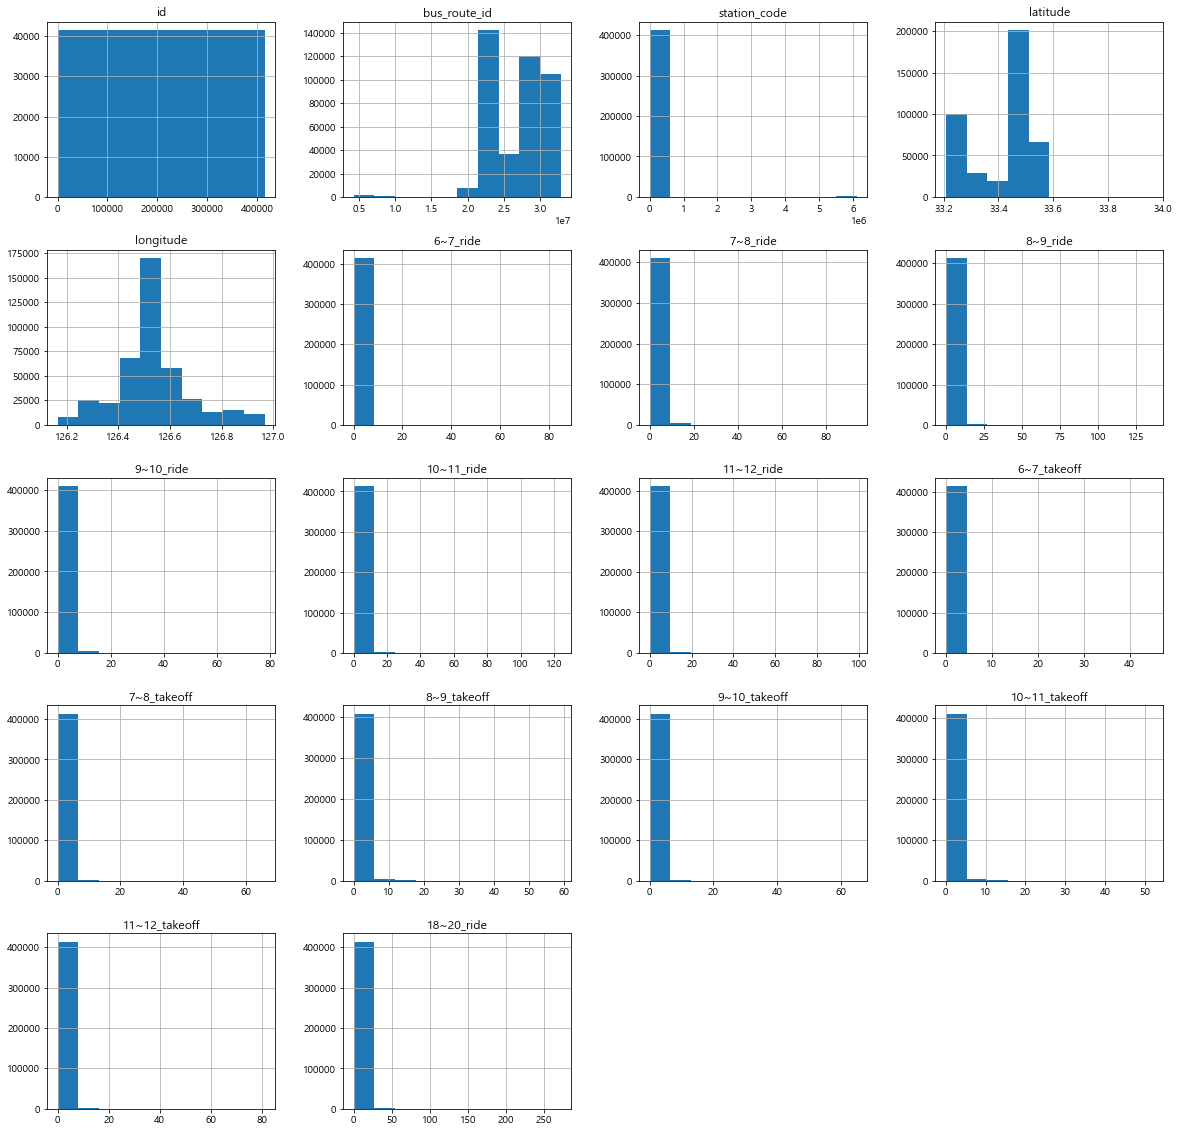

In [9]:
_=train.hist(figsize=(20,20), bins=10)

* id는 완벽히 개별적인 정보로 없어도 상관 없을 거 같다.
* 거의 대부분의 분포가 한쪽에 쏠려 있다.

In [10]:
train.isnull().sum()

id               0
date             0
bus_route_id     0
in_out           0
station_code     0
station_name     0
latitude         0
longitude        0
6~7_ride         0
7~8_ride         0
8~9_ride         0
9~10_ride        0
10~11_ride       0
11~12_ride       0
6~7_takeoff      0
7~8_takeoff      0
8~9_takeoff      0
9~10_takeoff     0
10~11_takeoff    0
11~12_takeoff    0
18~20_ride       0
dtype: int64

In [11]:
test.isnull().sum()

id               0
date             0
bus_route_id     0
in_out           0
station_code     0
station_name     0
latitude         0
longitude        0
6~7_ride         0
7~8_ride         0
8~9_ride         0
9~10_ride        0
10~11_ride       0
11~12_ride       0
6~7_takeoff      0
7~8_takeoff      0
8~9_takeoff      0
9~10_takeoff     0
10~11_takeoff    0
11~12_takeoff    0
dtype: int64

* 그나마 다행으로 결측치는 없다

<AxesSubplot:>

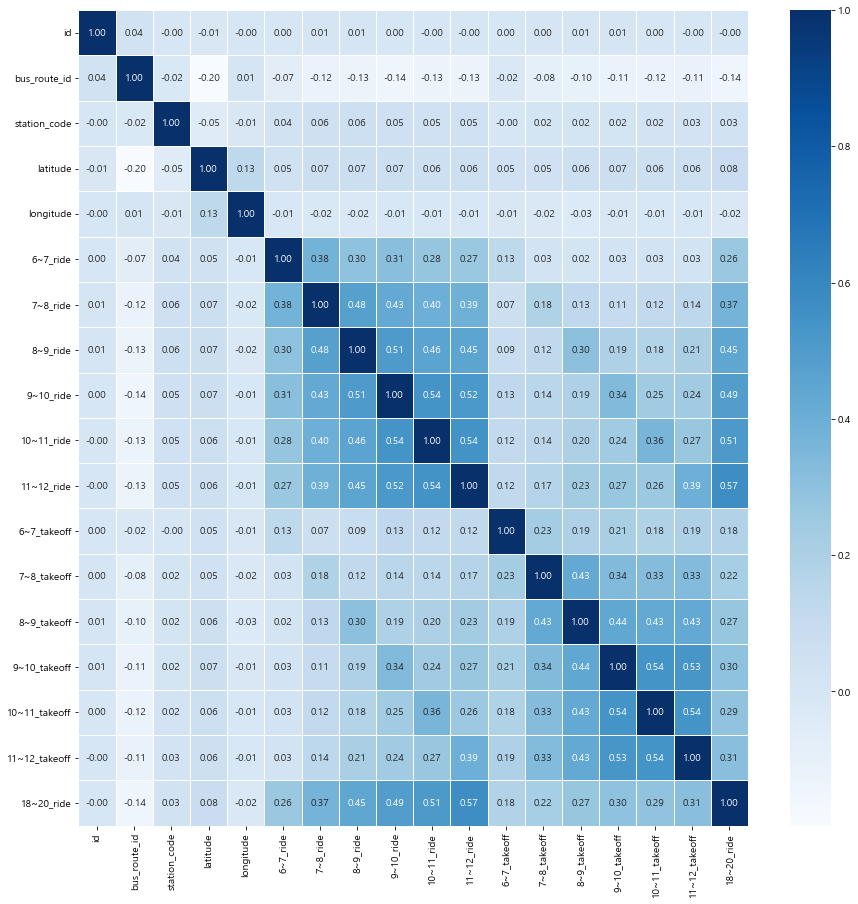

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

* 또 다른 다행인점으로는 확실히 18~20에 영향을 끼치는 변수들이 은근 있어보인다는 점이다.

In [13]:
train.describe()

,id,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
count,415423.000000,4.154230e+05,4.154230e+05,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000
mean,207711.000000,2.691935e+07,4.209311e+04,33.420375,126.533574,0.305893,0.829699,0.815350,0.642475,0.599618,0.579393,0.112870,0.344870,0.516481,0.430922,0.408001,0.402874,1.242095
std,119922.434776,3.924652e+06,4.971504e+05,0.107996,0.140986,1.109766,2.255116,2.317561,1.959844,1.885941,1.942137,0.597714,1.279179,1.658850,1.485124,1.412839,1.446080,4.722287
min,0.000000,4.270000e+06,1.000000e+00,33.208350,126.165040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103855.500000,2.346000e+07,3.200000e+02,33.291080,126.475780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,207711.000000,2.803000e+07,1.130000e+03,33.478850,126.529770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,311566.500000,3.003000e+07,2.226000e+03,33.500020,126.575890,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,415422.000000,3.282000e+07,6.115101e+06,33.963640,126.965670,85.000000,94.000000,136.000000,78.000000,124.000000,99.000000,45.000000,66.000000,59.000000,65.000000,52.000000,81.000000,272.000000


* 거의 고정적인 인구가 꾸준히 이용하는 것 같다. max외에 0인 변수들이 꽤나 많다.

In [14]:
train['date'].value_counts()

2019-09-19    16030
2019-09-10    16005
2019-09-24    15968
2019-09-17    15960
2019-09-30    15884
2019-09-26    15870
2019-09-25    15863
2019-09-20    15827
2019-09-27    15808
2019-09-18    15767
2019-09-05    15706
2019-09-16    15687
2019-09-23    15624
2019-09-03    15485
2019-09-11    15415
2019-09-06    15352
2019-09-09    15297
2019-09-02    14960
2019-09-04    14739
2019-09-28    13219
2019-09-29    12124
2019-09-08    11582
2019-09-01    11538
2019-09-21    11534
2019-09-12    11375
2019-09-15    11209
2019-09-14    10636
2019-09-07    10198
2019-09-13     8708
2019-09-22     6053
Name: date, dtype: int64

<AxesSubplot:xlabel='in_out', ylabel='count'>

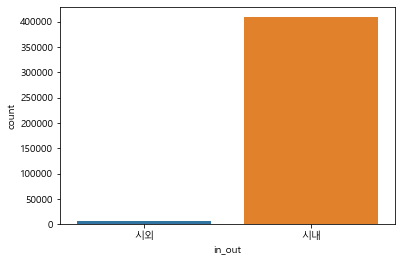

In [15]:
sns.countplot(data=train,x='in_out' )

* 시내가 압도적으로 많다

<AxesSubplot:xlabel='bus_route_id', ylabel='count'>

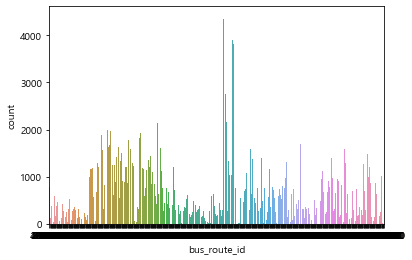

In [16]:
sns.countplot(data=train,x='bus_route_id' )

In [17]:
train['bus_route_id'].value_counts()

28510000    4393
28490000    4346
28500000    4207
28700000    4082
28690000    3892
            ... 
31060000       2
21590000       2
30080000       2
31040000       1
28800000       1
Name: bus_route_id, Length: 613, dtype: int64

* 버스 정류장 아이디, 노선 아이디 등은 분명 id에 나라에서 정한 규칙이 있을 건데 다음과 같다.

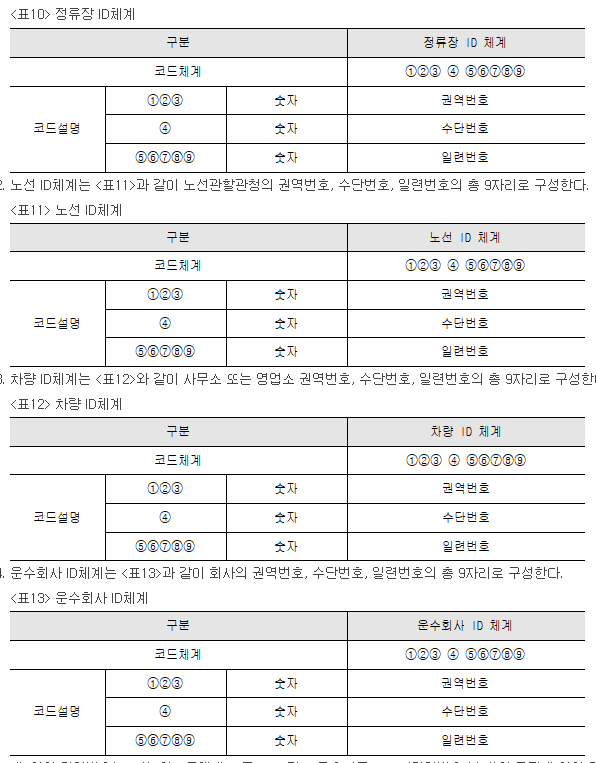

In [18]:
train['station_name'].nunique()

1961

* 정류장 이름이 총 1961개가 있다

# 데이터 전처리

* 데이터 프레임 전처리를 위해 하나로 합치기

In [19]:
df = pd.concat([train, test]).reset_index(drop=True)
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["dayofweek"] = df["date"].dt.dayofweek

In [20]:
df.shape

(643593, 25)

* 필요 없는 칼럼 드랍 시키기, ['id','date','station_name']

In [21]:
df.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')

In [22]:
df=df.drop(['id','date','station_name'], axis=1)

* 시내외에 대한 칼럼 더미화 시키기

In [23]:
df=pd.get_dummies(df)

In [24]:
df.head()

,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,...,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,year,month,day,dayofweek,in_out_시내,in_out_시외
0,4270000,344,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,...,0.0,0.0,0.0,0.0,2019,9,1,6,0,1
1,4270000,357,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,...,0.0,0.0,0.0,5.0,2019,9,1,6,0,1
2,4270000,432,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2019,9,1,6,0,1
3,4270000,1579,33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,...,0.0,0.0,0.0,53.0,2019,9,1,6,1,0
4,4270000,1646,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2019,9,1,6,1,0


버스 노선에 대한 아이디 분리하기
- 앞에 세개는 권역 번호
- 4번째는 수단번호
- 뒤는 일련번호

In [25]:
a=df['bus_route_id'][1]
str(a)[:3]
str(a)[4]

'0'

In [26]:
권역번호=[]
수단번호=[]
일련번호=[]
for i in df['bus_route_id']:
    권역번호.append(int(str(i)[:3]))
    수단번호.append(int(str(i)[4]))
    일련번호.append(int(str(i)[4:]))

In [27]:
df['station_권역번호']=권역번호
df['station_수단번호']=수단번호
df['station_일련번호']=일련번호

In [28]:
df.columns

Index(['bus_route_id', 'station_code', 'latitude', 'longitude', '6~7_ride',
       '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride',
       '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff',
       '10~11_takeoff', '11~12_takeoff', '18~20_ride', 'year', 'month', 'day',
       'dayofweek', 'in_out_시내', 'in_out_시외', 'station_권역번호', 'station_수단번호',
       'station_일련번호'],
      dtype='object')

In [29]:
df['station_일련번호'].value_counts()

0    643593
Name: station_일련번호, dtype: int64

station 일련번호는 약간 아이디 같은 느낌이라서 데이터에도 없는 듯하다 지워버리자

In [30]:
df=df.drop('station_일련번호', axis=1)

In [31]:
df=df.drop('station_수단번호', axis=1)

## 지역에 관한 데이터를 어떻게 해야 할까??

중점으로부터의 거리에 대한 변수를 만들고 경도 위도를 지워주자

In [32]:
lat_mean=df['latitude'].mean()
long_mean=df['longitude'].mean()

In [33]:
type(lat_mean)

float

In [34]:
df['distance_from_middle']=np.sqrt((df['latitude']-lat_mean)**2 + (df['longitude']-long_mean)**2)

In [35]:
df['distance_from_middle']

0         0.080402
1         0.084647
2         0.086142
3         0.095027
4         0.204046
            ...   
643588    0.372788
643589    0.203628
643590    0.270306
643591    0.081576
643592    0.173257
Name: distance_from_middle, Length: 643593, dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643593 entries, 0 to 643592
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   bus_route_id          643593 non-null  int64  
 1   station_code          643593 non-null  int64  
 2   latitude              643593 non-null  float64
 3   longitude             643593 non-null  float64
 4   6~7_ride              643593 non-null  float64
 5   7~8_ride              643593 non-null  float64
 6   8~9_ride              643593 non-null  float64
 7   9~10_ride             643593 non-null  float64
 8   10~11_ride            643593 non-null  float64
 9   11~12_ride            643593 non-null  float64
 10  6~7_takeoff           643593 non-null  float64
 11  7~8_takeoff           643593 non-null  float64
 12  8~9_takeoff           643593 non-null  float64
 13  9~10_takeoff          643593 non-null  float64
 14  10~11_takeoff         643593 non-null  float64
 15  

In [37]:
df=df.drop('latitude', axis=1)
df=df.drop('longitude', axis=1)

전처리 끝

# 라이브러리 불러오기 및 데이터셋 나눠주기

In [38]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#기계 학습 모델 구축 패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols



In [39]:
feature_names=['station_code', '6~7_ride','distance_from_middle',
       '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride',
       '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff',
       '10~11_takeoff', '11~12_takeoff', 'year', 'month', 'day',
       'dayofweek', 'in_out_시내', 'in_out_시외', 'station_권역번호']

In [40]:
label_name='18~20_ride'

* 답이 없는건 너무 답답하니까 0 ~ 315422까지는 학습용, 315423 ~ 415423 테스트 용으로 쪼개자

In [41]:
X_train=df[feature_names].iloc[:315423]
y_train=df[label_name].iloc[:315423]
X_test=df[feature_names].iloc[315423:415423]
y_test=df[label_name].iloc[315423:415423]

In [42]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((315423, 21), (315423,), (100000, 21), (100000,))

# Linear regression

## 모델 구축 

In [43]:
# 선형 회귀 모델 가정 확인
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

C:\Users\Chalie\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


* 확률 오차의 정규성을 확인 결과 진짜 만족하지 못한다는 것을 확인 가능

C:\Users\Chalie\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\Chalie\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


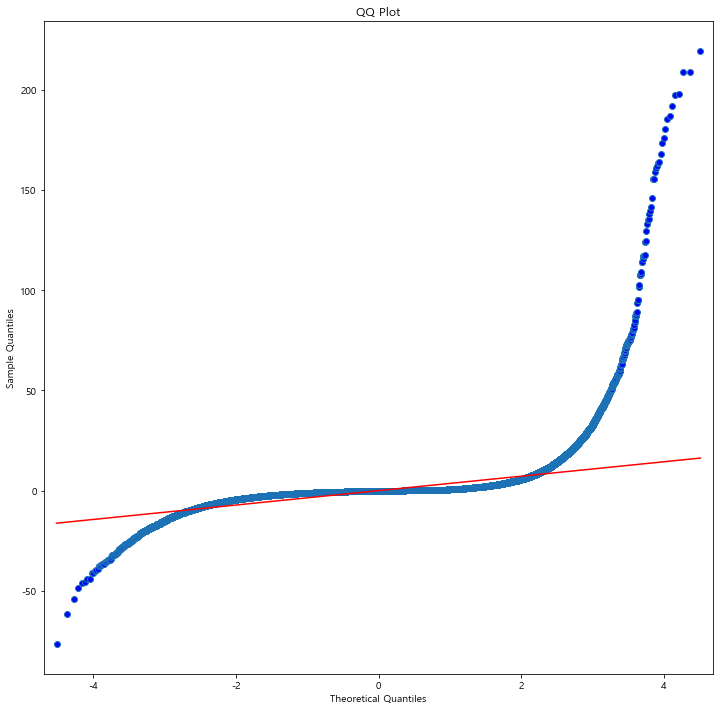

In [44]:
# 확률 오차의 정규성 확인
model_residuals = model_trained.resid

fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

* r2가 0.44, adj.r2는 0.439가 나온 것을 확인할 수 있었다.
* 시내에 대한 데이터는 p_value가 0.05를 넘어가는 것을 확인 가능 (다중 회귀 모델의 가정을 충족할 수 있는가?)

In [45]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:             18~20_ride   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.380e+04
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:05:44   Log-Likelihood:            -8.5154e+05
No. Observations:              315423   AIC:                         1.703e+06
Df Residuals:                  315404   BIC:                         1.703e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
station_code         -5.572e-08 

* p_value가 0.05를 넘어가는 변수를 제거 후 다시 진행

In [46]:
model = sm.OLS(y_train, X_train.drop(['in_out_시내', 'in_out_시외'], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:             18~20_ride   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.462e+04
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:05:44   Log-Likelihood:            -8.5154e+05
No. Observations:              315423   AIC:                         1.703e+06
Df Residuals:                  315405   BIC:                         1.703e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
station_code         -5.403e-08 

* dayofweek도 다시 드랍후 다시 진행

In [47]:
model = sm.OLS(y_train, X_train.drop(['in_out_시내', 'in_out_시외','dayofweek'], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:             18~20_ride   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.553e+04
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:05:44   Log-Likelihood:            -8.5155e+05
No. Observations:              315423   AIC:                         1.703e+06
Df Residuals:                  315406   BIC:                         1.703e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
station_code         -5.443e-08 

In [48]:
X_test = sm.add_constant(X_test)

C:\Users\Chalie\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [49]:
y_test_pred = model_trained.predict(X_test.drop(['in_out_시내', 'in_out_시외','dayofweek'], axis=1))
y_test_pred.head()

315423    5.213147
315424    0.407350
315425    0.904257
315426    0.712109
315427    0.462468
dtype: float64

## RMSE

In [50]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

3.2625950576666694

# DecisionTreeRegressor

## 모델 구축하기

In [51]:
model = DecisionTreeRegressor()
model

DecisionTreeRegressor()

In [52]:
y_val_predict = cross_val_predict(model, X_train, y_train, cv=3)
y_val_predict[:5]

array([ 1.,  6.,  0., 59.,  0.])

In [53]:
mse = mean_squared_error(y_train, y_val_predict)

## RMSE

생각보다 결과가 잘나와 보이는데 오버피팅일 가능성이 매우 높은거 같다

In [54]:
print(f'mse:{mse}, rmse:{np.sqrt(mse)}')

mse:19.50522684352969, rmse:4.4164722169996375


In [55]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
model.feature_importances_

array([0.0594511 , 0.02414702, 0.13827996, 0.03728578, 0.06331662,
       0.0536464 , 0.09034321, 0.30681217, 0.01511657, 0.02581226,
       0.01840249, 0.01685542, 0.01735007, 0.02132026, 0.        ,
       0.        , 0.03504121, 0.03455657, 0.00056464, 0.00070655,
       0.04099169])

<AxesSubplot:>

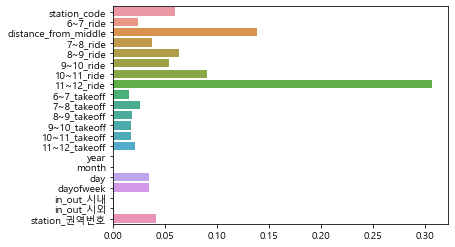

In [57]:
sns.barplot(x=model.feature_importances_,y=feature_names)

어떤 feature가 어느정도 영향을 미쳤는지 파악

* 깊이에 따른 test와 train 에 대한 r2 값을 저장

In [58]:
max_depths = [1, 3, 5, 7, 10, 20, None]
train_r2 = []
test_r2 = []

for max_depth in max_depths:
    
    # 모델 학습
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # 예측
    y_test_pred = model.predict(X_test)

    # 예측 score 기록
    train_r2.append(r2_score(y_pred=model.predict(X_train) , y_true = y_train) )
    test_r2.append(r2_score(y_pred= y_test_pred, y_true = y_test))


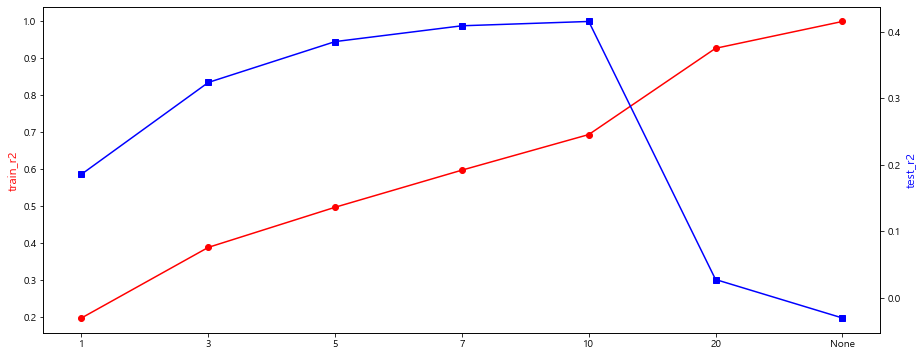

In [59]:
fig, ax = plt.subplots(figsize=(15, 6))

xticks = list(map(str, max_depths))

ax.plot(range(len(max_depths)), train_r2, color='red', marker='o')
ax.set_ylabel('train_r2', color='red', fontsize=12)

ax2 = ax.twinx()
ax2.plot(range(len(max_depths)), test_r2, color='blue', marker='s')
ax2.set_ylabel('test_r2', color='blue', fontsize=12)

plt.xticks(range(len(max_depths)), xticks)
plt.show()

위에 교점이 깊이로 적당할거 같다 이상 넘어가면 과적합일듯

## 개선하기

중요도가 거의 없는 feature을 삭제하고 돌려보자

In [65]:
feature_names=['station_code', '6~7_ride','distance_from_middle',
       '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride',
       '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff',
       '10~11_takeoff', '11~12_takeoff', 'day',
       'dayofweek', 'station_권역번호']

In [66]:
label_name='18~20_ride'

In [67]:
X_train=df[feature_names].iloc[:315423]
y_train=df[label_name].iloc[:315423]
X_test=df[feature_names].iloc[315423:415423]
y_test=df[label_name].iloc[315423:415423]

깊이 3에서 test의 r2가 가장 높았기 때문에 깊이를 3으로 설정

In [68]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

y_val_predict = cross_val_predict(model, X_train, y_train, cv=3)
y_val_predict[:5]

array([ 4.3295174 , 11.50163934,  0.62113568, 20.84679089,  0.62113568])

확실히 개선은 되었다. 근데 linear regression 보다는 딸리는 모습이다.

In [69]:
mse = mean_squared_error(y_train, y_val_predict)
print('rmse', np.sqrt(mse))

rmse 3.8710115991008553


<AxesSubplot:>

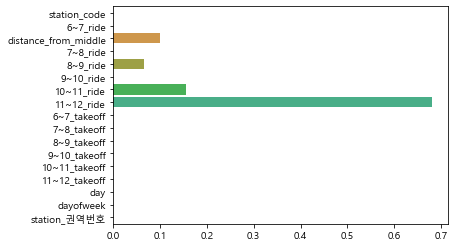

In [70]:
sns.barplot(x=model.feature_importances_,y=feature_names)

# RandomForest

## 모델 구축

In [43]:
model = RandomForestRegressor(random_state=42)
model

RandomForestRegressor(random_state=42)

교차 검증

In [ ]:
cross_validate(model, X_train, y_train, cv=3, scoring="neg_mean_squared_error")

In [123]:
y_valid_predict = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1)
y_valid_predict[:10]

array([ 2.95,  6.8 ,  0.89, 26.04,  0.65,  0.76,  2.21,  2.3 ,  0.82,
        0.33])

In [124]:
mse = mean_squared_error(y_train, y_valid_predict)

## RMSE

In [125]:
np.sqrt(mse)

2.99282345441786

In [126]:
max_depths = [1, 3, 5, 7, 10, 20, None]
train_r2 = []
test_r2 = []

for max_depth in max_depths:
    
    # 모델 학습
    model = RandomForestRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # 예측
    y_test_pred = model.predict(X_test)

    # 예측 score 기록
    train_r2.append(r2_score(y_pred=model.predict(X_train) , y_true = y_train) )
    test_r2.append(r2_score(y_pred= y_test_pred, y_true = y_test))

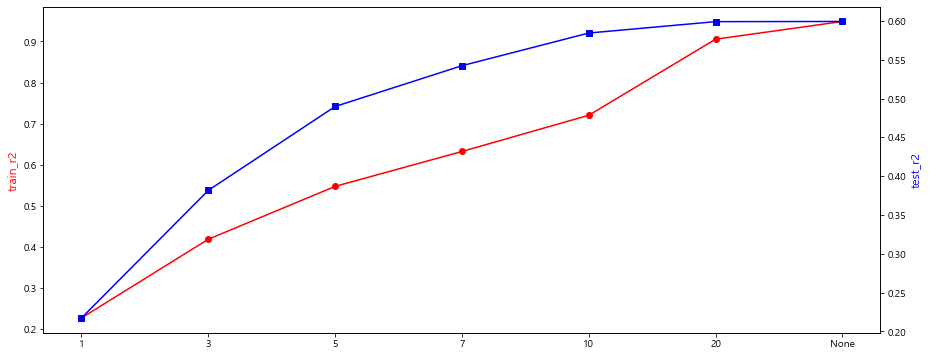

In [127]:
fig, ax = plt.subplots(figsize=(15, 6))

xticks = list(map(str, max_depths))

ax.plot(range(len(max_depths)), train_r2, color='red', marker='o')
ax.set_ylabel('train_r2', color='red', fontsize=12)

ax2 = ax.twinx()
ax2.plot(range(len(max_depths)), test_r2, color='blue', marker='s')
ax2.set_ylabel('test_r2', color='blue', fontsize=12)

plt.xticks(range(len(max_depths)), xticks)
plt.show()

## 개선해보기

In [44]:
model = RandomForestRegressor(random_state=42)
model

RandomForestRegressor(random_state=42)

In [45]:
feature_names=['station_code', '6~7_ride','distance_from_middle',
       '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride',
       '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff',
       '10~11_takeoff', '11~12_takeoff', 'day',
       'dayofweek', 'station_권역번호']

In [46]:
label_name='18~20_ride'

In [47]:
X_train=df[feature_names].iloc[:315423]
y_train=df[label_name].iloc[:315423]
X_test=df[feature_names].iloc[315423:415423]
y_test=df[label_name].iloc[315423:415423]

In [46]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"n_estimators": np.random.randint(100, 1000, 10), 
                      "max_depth" :  np.random.randint(5, 100, 10)}

clf = RandomizedSearchCV(model, 
                         param_distributions=param_distributions, 
                         n_iter=3, cv=3, n_jobs=-1, verbose=2, 
                         scoring="neg_root_mean_squared_error",random_state=42)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': array([10, 22, 43, 13, 24, 79, 16, 21, 21, 22]),
                                        'n_estimators': array([520, 424, 147, 779, 941, 567, 744, 588, 222, 636])},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [47]:
clf.best_estimator_

RandomForestRegressor(max_depth=21, n_estimators=779, random_state=42)

In [48]:
clf.best_score_

-3.0358637707490814

In [49]:
best_model=clf.best_estimator_
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=21, n_estimators=779, random_state=42)

In [50]:
y_predict = best_model.predict(X_test)

In [51]:
mse = mean_squared_error(y_test, y_predict)

In [52]:
np.sqrt(mse)

2.785581866548595